# **8. Implement Principal Component Analysis for Dimensionality Reduction**

# **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Loading the dataset

In [2]:
df = pd.read_csv('drug_dataset.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# Data Preprocessing
# Handle missing data (if any)

In [7]:
df.dropna(inplace=True)

In [8]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Encode categorical attributes using label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

In [11]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


# Standardize the features

In [16]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df))
scaled_data


,0,1,2,3,4,5
0,-1.291591,-1.040833,-1.110169,-0.970437,1.286522,0.825654
1,0.162699,0.960769,0.109797,-0.970437,-0.415145,-0.635680
2,0.162699,0.960769,0.109797,-0.970437,-0.828558,-0.635680
3,-0.988614,-1.040833,1.329763,-0.970437,-1.149963,0.094987
4,1.011034,-1.040833,0.109797,-0.970437,0.271794,0.825654
...,...,...,...,...,...,...
195,0.708057,-1.040833,0.109797,-0.970437,-0.626917,-0.635680
196,-1.715759,0.960769,0.109797,-0.970437,-0.565995,-0.635680
197,0.465676,0.960769,1.329763,-0.970437,-0.859089,0.094987
198,-1.291591,0.960769,1.329763,1.030464,-0.286500,0.094987


# Co-relation between features without PCA


<AxesSubplot:>

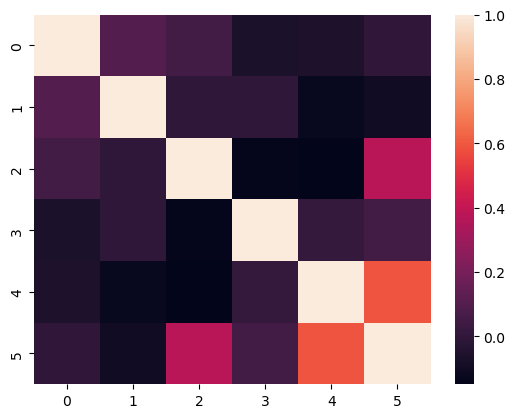

In [17]:
import seaborn as sns

sns.heatmap(scaled_data.corr())


# Apply Principal Component Analysis

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()


,PC1,PC2,PC3
0,-1.420625,1.337708,-0.888666
1,0.942232,-0.827097,0.207158
2,1.196140,-0.943640,0.092354
3,0.018744,-1.036722,-2.208449
4,-0.910887,-0.735387,-0.189733


# Correlation using PCA

<AxesSubplot:>

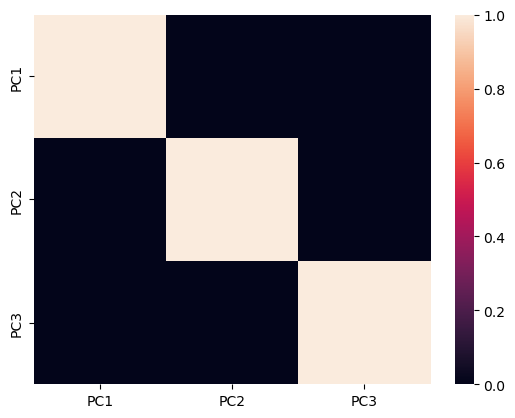

In [21]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())